In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
# Stats
from scipy.stats import mannwhitneyu

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set filepath
REPOSITORY='/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/'
DESCRIPTORFILE='MD_Cart_WDH.csv'
LHSSELECTION='LHSSelection.csv'
CLUSTERRANDSELECTION='ClusterRandomSelection.csv'
CLUSTERSORTEDSELECTION='ClusterSortedSelection.csv'
SPARSENESSSORTEDSELECTION='sortSelection.csv'
AREPUCKFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+DESCRIPTORFILE
AREPOTATOFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+DESCRIPTORFILE
ARETRICYCLEFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+DESCRIPTORFILE
print('Filepath: ' + REPOSITORY)

Filepath: /home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/


In [3]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(REPOSITORY):
    for folder in d:
        print(os.path.join(r, folder))
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4854-2568203076
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4729-2473138500
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4748-1166241614
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4853-3533916095
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4728-3552986462
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4875-4076501458
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4905-1634114651
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4771-2985634593
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4830-1502148383
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4706-2402252332
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4852-3751257942
/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4957-201

In [4]:
# Get data evolved robots
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + DESCRIPTORFILE, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)
# Hand-made robots
my_robot = []
with open(AREPUCKFILEPATH, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
with open(AREPOTATOFILEPATH, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
with open(ARETRICYCLEFILEPATH, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
# Get LHS bootstrap selection
lhs_selection = []
with open(REPOSITORY + LHSSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        lhs_selection.append(row[:]) # Last character is empty for some reason
clusterrand_selection = []
with open(REPOSITORY + CLUSTERRANDSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        clusterrand_selection.append(row[:]) # Last character is empty for some reason
clustersort_selection = []
with open(REPOSITORY + CLUSTERSORTEDSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        clustersort_selection.append(row[:]) # Last character is empty for some reason
spasort_selection = []
with open(REPOSITORY + SPARSENESSSORTEDSELECTION, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        spasort_selection.append(row[:]) # Last character is empty for some reason

In [5]:
POPULATION = 100
REPLICATES = len(my_replicates)
#evaluations = len(my_replicates[0])
EVALUATIONS = 30000
FEATURES = len(my_replicates[0][0])
GENERATIONS = int(EVALUATIONS / POPULATION)
interval=1000
rangeValues = range(0,EVALUATIONS,interval)
lenRange = len(rangeValues)
print("Replicates: ", REPLICATES, "Number of evaluations: ", EVALUATIONS, "Features size: ", FEATURES)


Replicates:  20 Number of evaluations:  30000 Features size:  9


In [6]:
# Check all replicates have the minimum number of evaluations
for i in range(REPLICATES):
    if len(my_replicates[i]) < EVALUATIONS:
        print("Error!")

In [7]:
# Process data
repplicates_data = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_replicates[rep]]) # Convert to array
    repplicates_data.append(tempDat)
print("Done!")

Done!


In [8]:
replicates_lhs_data = np.array([[int(y) for y in x] for x in lhs_selection]) # Convert to array
replicates_clusterrand_data = np.array([[int(y) for y in x] for x in clusterrand_selection]) # Convert to array
replicates_clustersort_data = np.array([[int(y) for y in x] for x in clustersort_selection]) # Convert to array
replicates_spasort_data = np.array([[int(y) for y in x] for x in spasort_selection]) # Convert to array

In [9]:
# Find sparseness
replicates_lhs_sparseness = []
for rep in range(REPLICATES):
    temAve = []
    for i in range(POPULATION):
        temDis = []
        iInd = replicates_lhs_data[rep][i]
        print("Replicate: ", rep, "Progress: ", i/POPULATION)
        for j in range(POPULATION):
            dist = []
            jInd = replicates_lhs_data[rep][j]
            dist = np.linalg.norm(repplicates_data[rep][iInd][1:]-repplicates_data[rep][jInd][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
        temAve.append(np.mean(sortedList))
        clear_output(wait=True)
    replicates_lhs_sparseness.append(temAve)
    print(rep)
print("Done!")
lhs_sparseness_mean = []
for rep in range(REPLICATES):
    lhs_sparseness_mean.append(np.mean(replicates_lhs_sparseness[rep]))

19
Done!


In [10]:
# Find sparseness
replicates_clusterrand_sparseness = []
for rep in range(REPLICATES):
    temAve = []
    for i in range(POPULATION):
        temDis = []
        iInd = replicates_clusterrand_data[rep][i]
        print("Replicate: ", rep, "Progress: ", i/POPULATION)
        for j in range(POPULATION):
            dist = []
            jInd = replicates_clusterrand_data[rep][j]
            dist = np.linalg.norm(repplicates_data[rep][iInd][1:]-repplicates_data[rep][jInd][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
        temAve.append(np.mean(sortedList))
        clear_output(wait=True)
    replicates_clusterrand_sparseness.append(temAve)
    print(rep)
print("Done!")
clusterrand_sparseness_mean = []
for rep in range(REPLICATES):
    clusterrand_sparseness_mean.append(np.mean(replicates_clusterrand_sparseness[rep]))

19
Done!


In [11]:
# Find sparseness
replicates_clustersort_sparseness = []
for rep in range(REPLICATES):
    temAve = []
    for i in range(POPULATION):
        temDis = []
        iInd = replicates_clustersort_data[rep][i]
        print("Replicate: ", rep, "Progress: ", i/POPULATION)
        for j in range(POPULATION):
            dist = []
            jInd = replicates_clustersort_data[rep][j]
            dist = np.linalg.norm(repplicates_data[rep][iInd][1:]-repplicates_data[rep][jInd][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
        temAve.append(np.mean(sortedList))
        clear_output(wait=True)
    replicates_clustersort_sparseness.append(temAve)
    print(rep)
print("Done!")
clustersort_sparseness_mean = []
for rep in range(REPLICATES):
    clustersort_sparseness_mean.append(np.mean(replicates_clustersort_sparseness[rep]))

19
Done!


In [12]:
# Find sparseness
replicates_spasort_sparseness = []
for rep in range(REPLICATES):
    temAve = []
    for i in range(POPULATION):
        temDis = []
        iInd = replicates_spasort_data[rep][i]
        print("Replicate: ", rep, "Progress: ", i/POPULATION)
        for j in range(POPULATION):
            dist = []
            jInd = replicates_spasort_data[rep][j]
            dist = np.linalg.norm(repplicates_data[rep][iInd][1:]-repplicates_data[rep][jInd][1:])
            temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
        temAve.append(np.mean(sortedList))
        clear_output(wait=True)
    replicates_spasort_sparseness.append(temAve)
    print(rep)
print("Done!")
spasort_sparseness_mean = []
for rep in range(REPLICATES):
    spasort_sparseness_mean.append(np.mean(replicates_spasort_sparseness[rep]))

19
Done!


In [15]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
stat, p = mannwhitneyu(lhs_sparseness_mean, clusterrand_sparseness_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
stat, p = mannwhitneyu(clusterrand_sparseness_mean, clustersort_sparseness_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=115.000, p=0.011
Different distribution (reject H0)
Statistics=196.000, p=0.462
Same distribution (fail to reject H0)


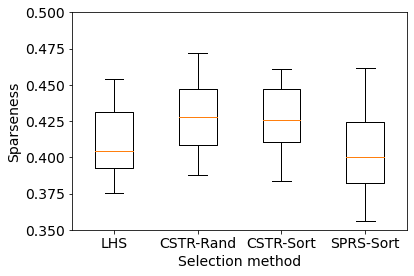

In [14]:
# Plot stuff
xValues = list(range(POPULATION, EVALUATIONS, POPULATION))
xValues = [x/POPULATION for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.boxplot([lhs_sparseness_mean, clusterrand_sparseness_mean, clustersort_sparseness_mean, spasort_sparseness_mean])
# plt.boxplot([lhs_sparseness_mean, clusterrand_sparseness_mean, clustersort_sparseness_mean])

plt.xlabel('Selection method')
plt.ylabel('Sparseness')

axes = plt.gca()
axes.set_ylim([0.35,0.5])

plt.xticks([1, 2, 3, 4], ['LHS', 'CSTR-Rand', 'CSTR-Sort', 'SPRS-Sort'])

plt.savefig(REPOSITORY+'SelectionComparison.png',dpi=200)